In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [26]:
df = pd.read_excel("var3.xlsx", engine='openpyxl')
df.head()

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,9.0,1,2,Light,NaN,1230.0,1.56,5211.0,15610.0,1,1,0,0,1
1,30.0,1,2,Light,8.0,2715.0,2.03,2424.0,12600.0,1,1,1,0,0
2,15.0,1,2,light,NaN,878.0,1.81,3868.0,12600.0,1,1,0,1,1
3,20.0,1,2,light,NaN,2346.0,2.18,4546.0,13930.0,1,1,0,0,1
4,30.0,1,2,light,NaN,2542.0,1.63,3244.0,16030.0,0,0,0,0,0


In [27]:
df.shape

(69, 14)

In [28]:
df.dtypes

Площадь загальна кв.м               float64
Этаж                                  int64
Количество сотрудников в штаті        int64
Тип                                  object
Кількість відгуків в гуглі          float64
Количество чеков в месяц            float64
Среднее количество единиц в чеке    float64
Людинопотік                         float64
Середній дохід населення            float64
Зупинка ГТ                            int64
Зупинка ГТ додому                     int64
Кінцева зупинкка ГТ                   int64
Пішохідний перехід                    int64
Спеціалізований хліб                  int64
dtype: object

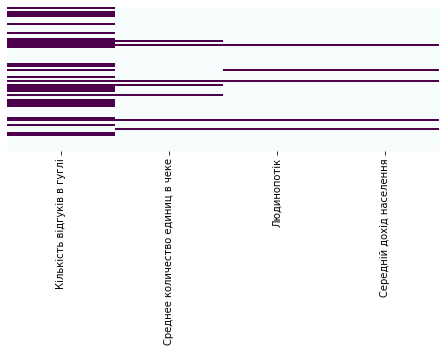

In [29]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > df.shape[0]*0.01].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),cbar=False, yticklabels=False, cmap='BuPu', ax=ax)
plt.show()

In [30]:
pd.DataFrame(df.isnull().sum())

,0
Площадь загальна кв.м,0
Этаж,0
Количество сотрудников в штаті,0
Тип,0
Кількість відгуків в гуглі,30
Количество чеков в месяц,0
Среднее количество единиц в чеке,7
Людинопотік,5
Середній дохід населення,5
Зупинка ГТ,0


In [31]:
#missing data is numeric, so let's recover it accordingly
dfm = df
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(dfm[['Кількість відгуків в гуглі']]).round()
dfm[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(dfm[['Среднее количество единиц в чеке']]).round()
dfm[['Людинопотік']] = imputer_mean.fit_transform(dfm[['Людинопотік']]).round()
dfm[['Середній дохід населення']] = imputer_mean.fit_transform(dfm[['Середній дохід населення']]).round()


In [32]:
dfm.describe()

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
count,69.000000,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.0,3.652174,42.898551,7105.030583,1.971014,2755.782609,11990.391304,0.362319,0.275362,0.086957,0.333333,0.318841
std,37.862989,0.0,1.607209,61.280489,4052.584218,0.240772,1981.850301,2474.008472,0.484192,0.449969,0.283836,0.474858,0.469441
min,4.000000,1.0,2.000000,1.000000,878.000000,1.000000,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.0,2.000000,12.000000,3734.000000,2.000000,1296.000000,11060.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,1.0,4.000000,43.000000,6694.000000,2.000000,2269.000000,12180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,1.0,4.000000,43.000000,8548.000000,2.000000,3880.000000,13300.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,232.300000,1.0,8.000000,367.000000,17537.000000,3.000000,10016.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
dfm.corr()

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
Площадь загальна кв.м,1.000000,NaN,0.466660,0.241902,0.349767,0.279662,0.018645,0.006163,-0.144563,-0.172557,-1.830306e-01,7.328371e-02,-0.181986
Этаж,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Количество сотрудников в штаті,0.466660,NaN,1.000000,0.418608,0.744866,0.277584,0.090550,-0.209592,0.032043,-0.028292,-1.583808e-01,7.707525e-02,0.012712
Кількість відгуків в гуглі,0.241902,NaN,0.418608,1.000000,0.324781,0.359606,-0.084851,-0.007150,0.113763,0.180756,-1.127793e-01,-7.007726e-02,0.231690
Количество чеков в месяц,0.349767,NaN,0.744866,0.324781,1.000000,0.178130,0.061377,-0.296576,-0.026547,-0.177996,-1.691573e-01,1.244926e-01,0.093544
Среднее количество единиц в чеке,0.279662,NaN,0.277584,0.359606,0.178130,1.000000,-0.181721,-0.126877,0.217554,0.074755,-1.777643e-01,8.574929e-02,0.082967
Людинопотік,0.018645,NaN,0.090550,-0.084851,0.061377,-0.181721,1.000000,0.244975,0.174835,0.248895,4.026798e-02,-9.453917e-03,0.015108
Середній дохід населення,0.006163,NaN,-0.209592,-0.007150,-0.296576,-0.126877,0.244975,1.000000,-0.130005,-0.071697,-9.198558e-02,-6.048574e-02,-0.151042
Зупинка ГТ,-0.144563,NaN,0.032043,0.113763,-0.026547,0.217554,0.174835,-0.130005,1.000000,0.682806,1.954017e-01,2.345208e-01,0.260668
Зупинка ГТ додому,-0.172557,NaN,-0.028292,0.180756,-0.177996,0.074755,0.248895,-0.071697,0.682806,1.000000,3.854822e-01,-2.294157e-02,0.413677


In [34]:
dfm.Этаж.value_counts() # Корреляция отсутствует так как значение не изменно

1    69
Name: Этаж, dtype: int64

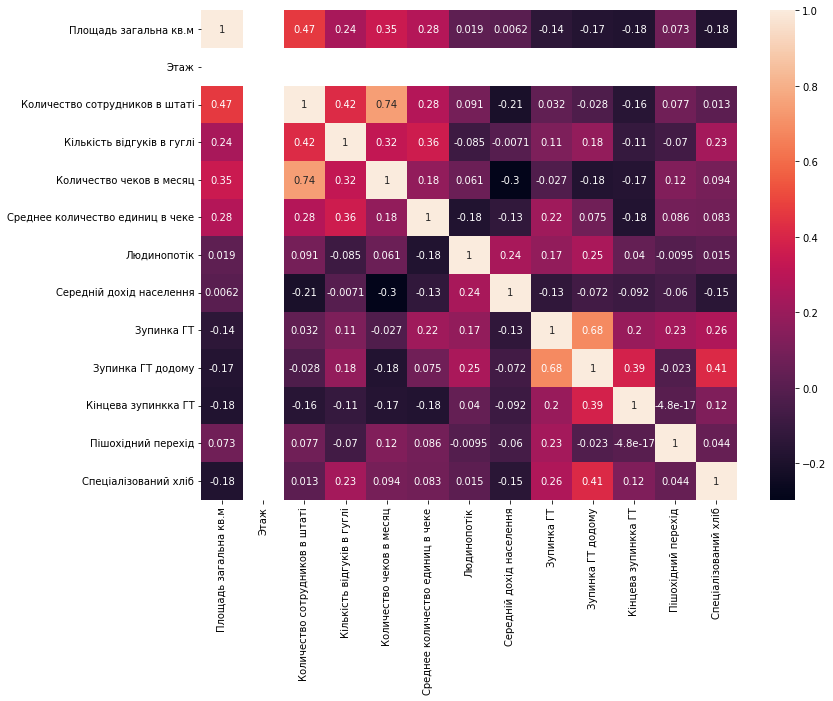

In [35]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Найбольшая корреляция между количеством чеков в месяц и количеством сотрудников в штате, так же на эти данные незначительно влияет Кількість відгуків в гуглі (однако в этих данных было очень много нан значение и использывать их для модели не рекомендуеться).

In [36]:

#encoding
dfs = dfm[['Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Тип,5,"[Light, light, Standart, Micro, Premium]",object


In [37]:
type_ = {'light':0,'Light':0, 'Standart':1,'Micro':2, 'Premium':3 } 
dfm['Тип'] = dfm['Тип'].map(type_)
dfm

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Среднее количество единиц в чеке,Людинопотік,Середній дохід населення,Зупинка ГТ,Зупинка ГТ додому,Кінцева зупинкка ГТ,Пішохідний перехід,Спеціалізований хліб
0,9.00,1,2,0,43.0,1230.0,2.0,5211.0,15610.0,1,1,0,0,1
1,30.00,1,2,0,8.0,2715.0,2.0,2424.0,12600.0,1,1,1,0,0
2,15.00,1,2,0,43.0,878.0,2.0,3868.0,12600.0,1,1,0,1,1
3,20.00,1,2,0,43.0,2346.0,2.0,4546.0,13930.0,1,1,0,0,1
4,30.00,1,2,0,43.0,2542.0,2.0,3244.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1,6,1,4.0,13552.0,2.0,2306.0,8750.0,0,0,0,1,1
65,27.26,1,4,0,3.0,7598.0,2.0,4065.0,13300.0,0,0,0,0,1
66,148.91,1,2,0,12.0,5431.0,2.0,906.0,11060.0,0,0,0,0,0
67,50.93,1,3,1,17.0,4375.0,2.0,1742.0,11900.0,0,0,0,0,0


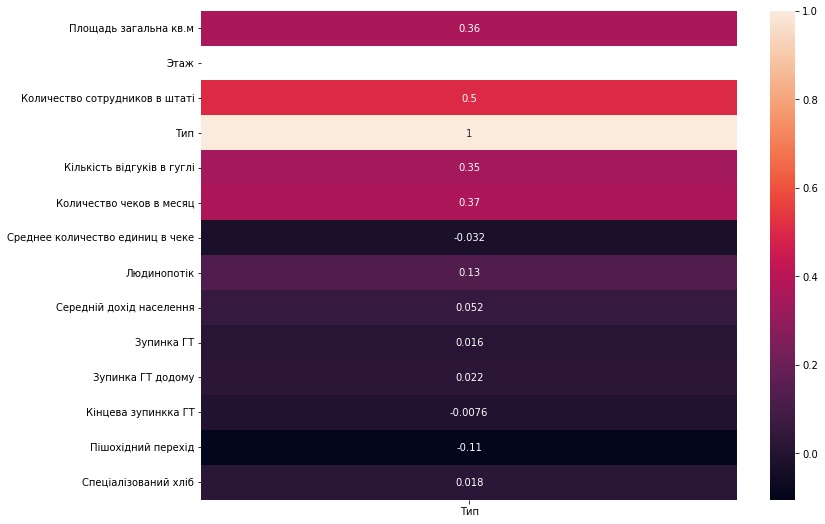

In [38]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[['Тип',]], annot=True)
plt.show()

Тип незначительно коррелирует с общей площадью.

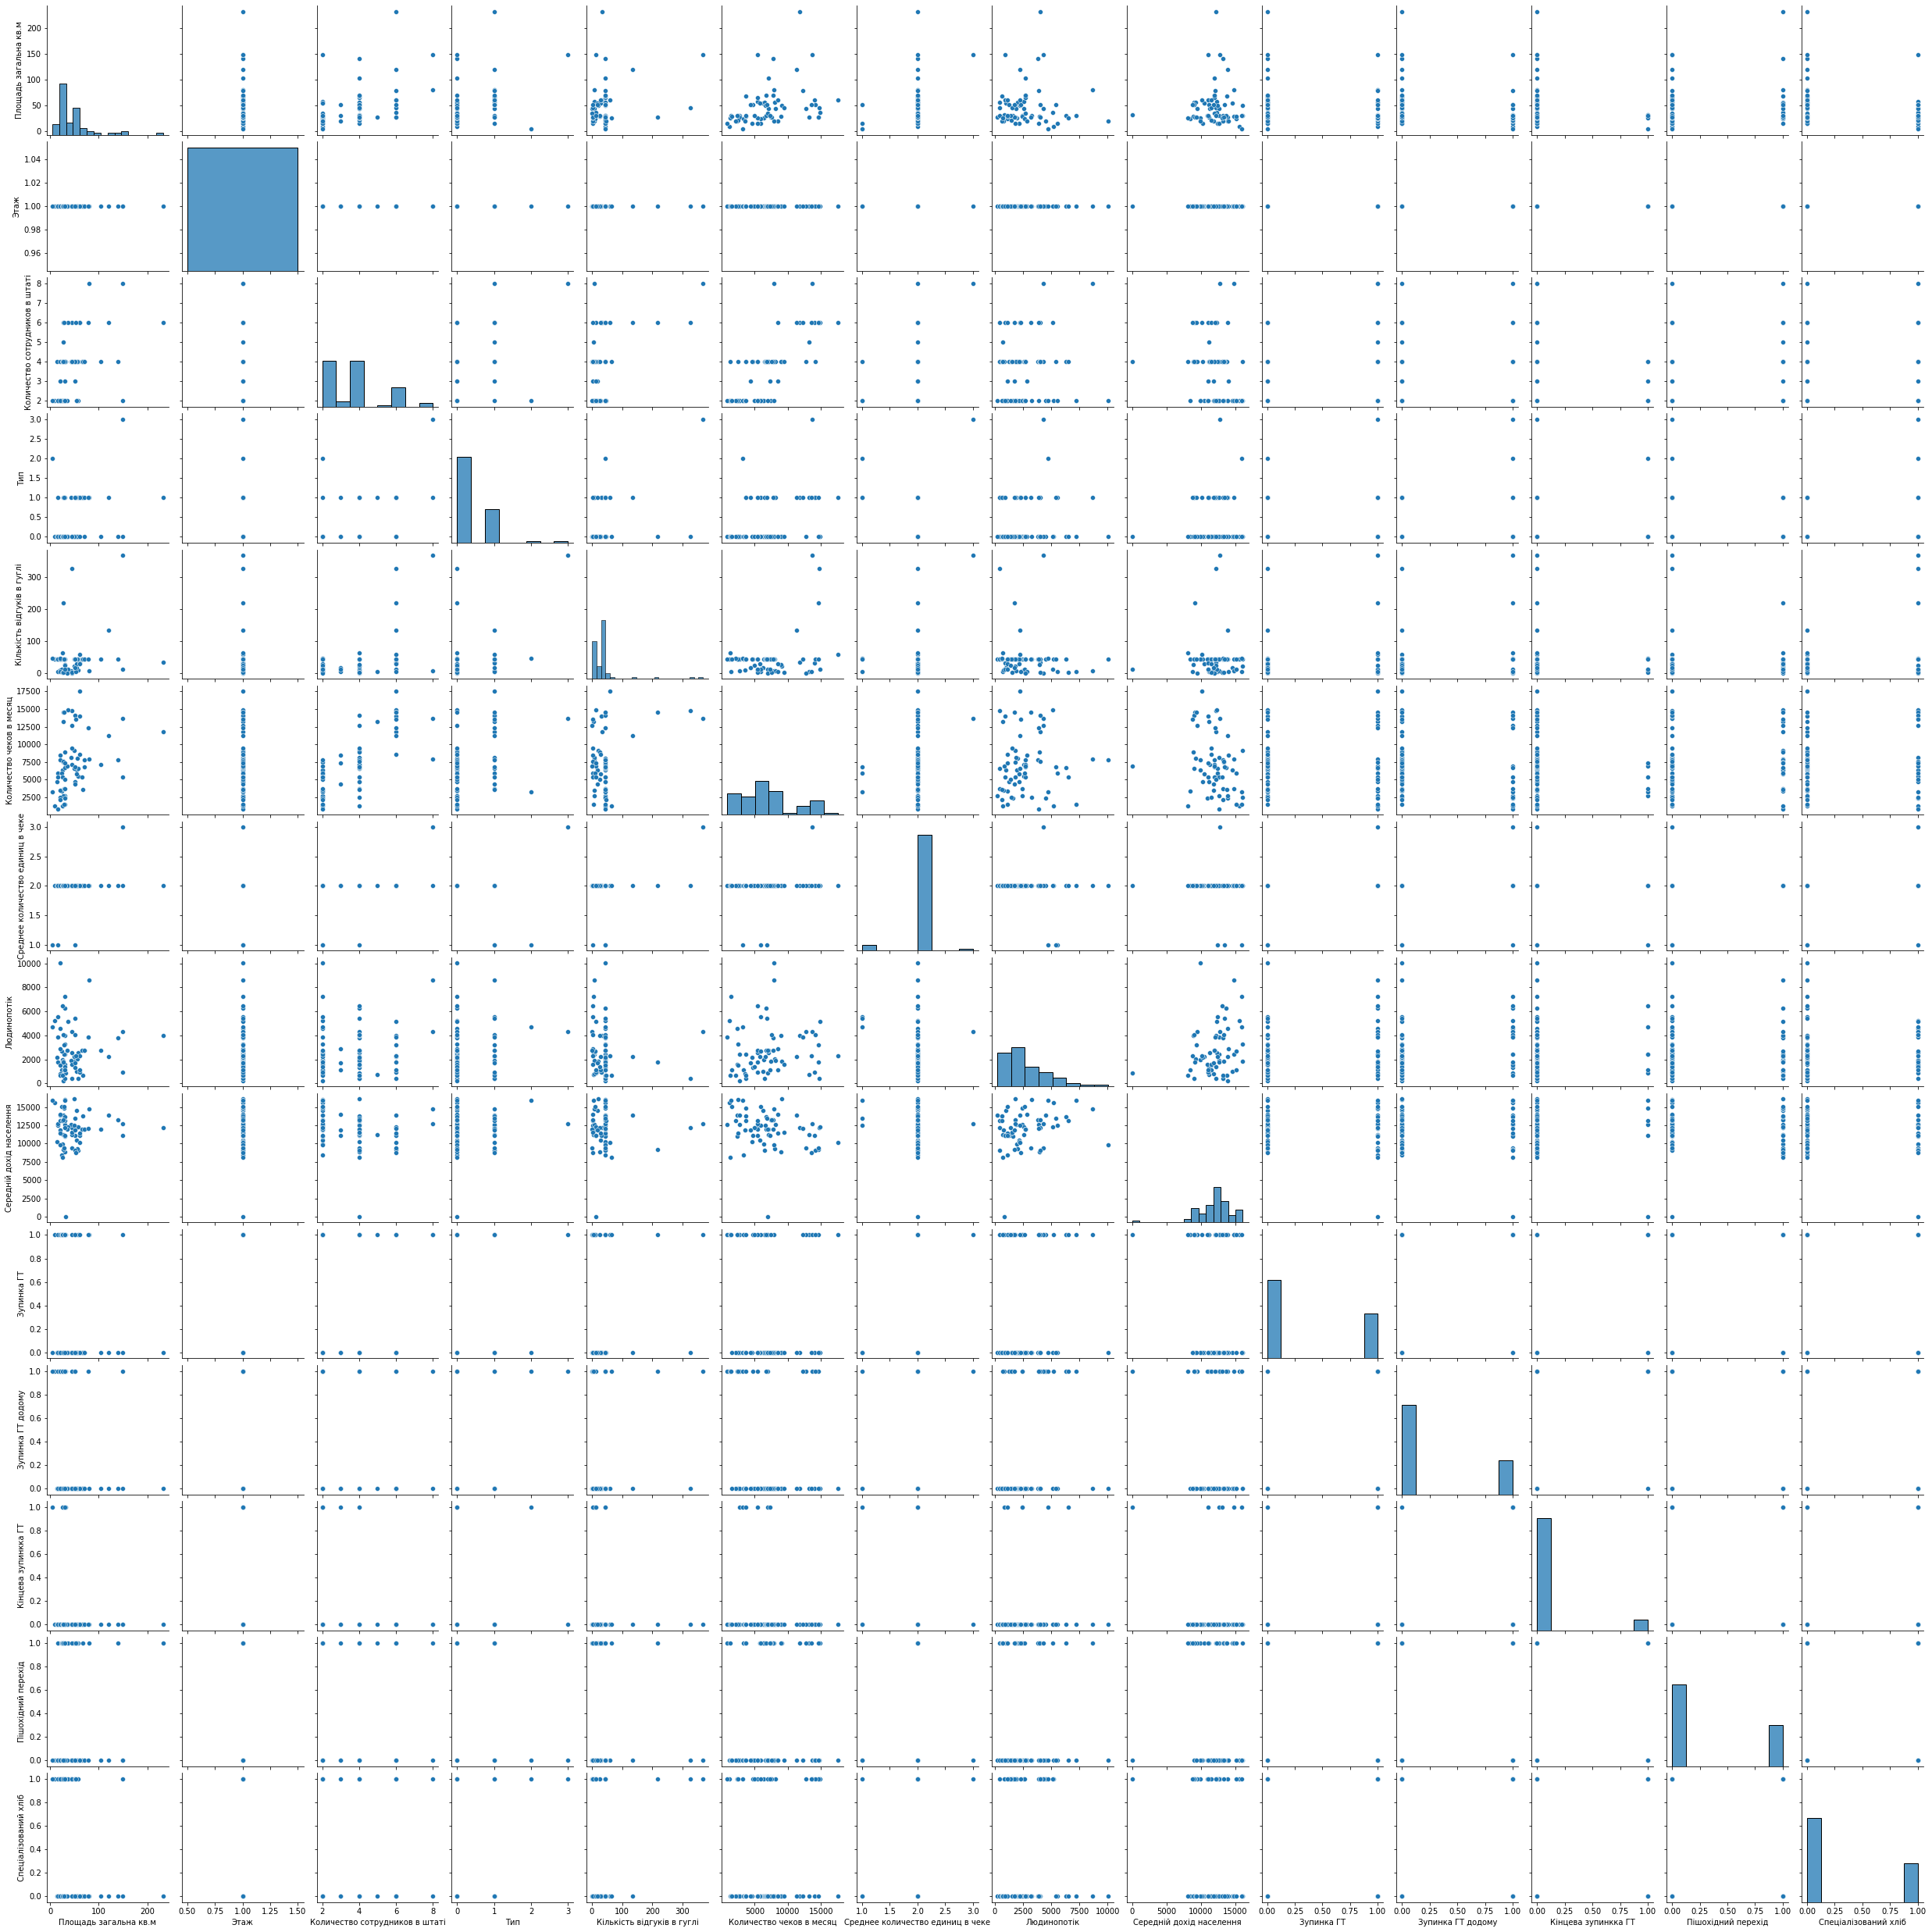

In [39]:
sns.pairplot(dfm)

Modeling

In [44]:
#linear regression
#Splitting the dataset into the Training set and Test set
feature_name = ['Количество сотрудников в штаті','Среднее количество единиц в чеке','Тип','Пішохідний перехід']
X =dfm[feature_name]
y = dfm['Количество чеков в месяц']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [45]:

# Fitting Simple Linear Regression to the Training set
f1 = ['Количество сотрудников в штаті']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([1790.30580914]), 633.143216507342)

In [46]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.514, 0.717)

In [47]:
print(mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

2871.06


1802.12

In [48]:
# Fitting Linear Regression based on 5 features to the Training set

from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

# Getting parameters
mr.coef_, mr.intercept_

(array([ 1787.3245424 , -1764.70833727,   241.23471008,   849.94113757]),
 3777.0432824813747)

In [49]:
# Predicting the Test set results
y_pred2 = mr.predict(X_test)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

(0.529, 0.617)

In [50]:
print(mean_squared_error(y_train, mr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred2, squared=False).round(2)

2825.46


2095.59

Если сравнивать с прошлой линейной регресией, многофакторная модель подверженна переобучению.

In [51]:
# Checking p-values
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.pvalues

const                               3.924238e-01
Количество сотрудников в штаті      4.293546e-07
Среднее количество единиц в чеке    4.397631e-01
Тип                                 7.803250e-01
Пішохідний перехід                  3.207260e-01
dtype: float64

In [52]:
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Количество чеков в месяц   R-squared:                       0.529
Model:                                  OLS   Adj. R-squared:                  0.491
Method:                       Least Squares   F-statistic:                     14.04
Date:                      Sat, 06 Nov 2021   Prob (F-statistic):           9.53e-08
Time:                              19:27:32   Log-Likelihood:                -515.10
No. Observations:                        55   AIC:                             1040.
Df Residuals:                            50   BIC:                             1050.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             3777.0433   4378.186      0.863      0.392   -5016.802    1.26e+04
Количество сотрудников в штаті    1787.3245    307.560      5.811      0.000    1169.572    2405.077
Среднее количество единиц в чеке -1764.7083   2265.908     -0.779      0.440   -6315.919    2786.503
Тип                                241.2347    860.313      0.280      0.780   -1486.755    1969.224
Пішохідний перехід                 849.9411    847.462      1.003      0.321    -852.236    2552.118
==============================================================================
Omnibus:                        1.818   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.018
Skew:                          -0.224   Prob(JB):                        0.601
Kurtosis:                       3.494   Cond. No.                         57.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Fitting Polynomial Regression to the dataset
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 1787.3245424 , -1764.70833727,   241.23471008,   849.94113757]),
 3777.0432824813747)

In [54]:
# Predicting the Test set results
y_pred = pr.predict(X_test)

# Coefficient of determination R^2
pr.score(X_train, y_train).round(3), pr.score(X_test, y_test).round(3)

(0.529, 0.617)

In [55]:
# Mean squared error
print(mean_squared_error(y_train, pr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

2825.46


2095.59

In [19]:
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [56]:
# Fitting Random Forest to the Training set
rf = RandomForestRegressor(n_estimators = 2, max_leaf_nodes = 25, random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test)

# Metrics
metrics(X_train, X_test, y_train, y_test, rf_y_pred, rf).round(2)

,RMSE,R2
Train,2455.66,0.64
Test,2340.47,0.52


In [57]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature_, round(importance, 2)) for feature_, importance in zip(feature_name, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Количество сотрудников в штаті Importance: 0.87
Variable: Пішохідний перехід   Importance: 0.08
Variable: Тип                  Importance: 0.04
Variable: Среднее количество единиц в чеке Importance: 0.01


Мы видим что все модели имеют плохие показатели R2.

Не желательно использовать данные о "Кількість відгуків в гуглі" как переменную для предсказания так как количество отсутствующих значений(NaN) слишком большае >40%

Исходя из R2 и среднеквадратической ошибки лучшей моделью будет линейная регрессия основанная на одной переменной.